<h1 align='center'> Normalization</h1>

- Normalization is the technique often use in data preprocessing for machine learning
- The goal of normalization is to change the value of numeric columns in the dataset to commun scale, without distoring diffrences in the ranges of valuesor losing information

__Types of normalization__

- MinMaxScaling
- Mean normalization
- Max Sbsolute scaling
- Robust scaling

### <font color='red'> MinMaxScaling</font>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [4]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

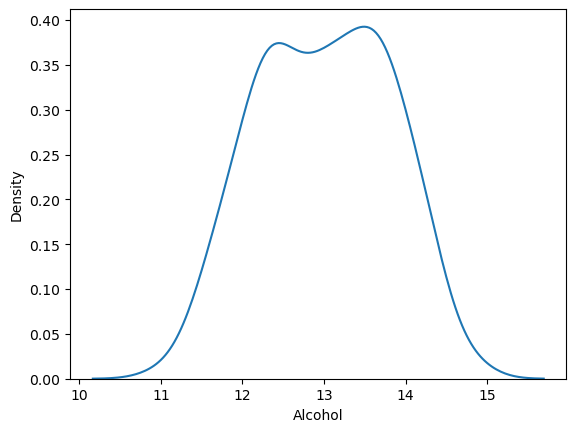

In [6]:
sns.distplot(df['Alcohol'], hist=False)

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

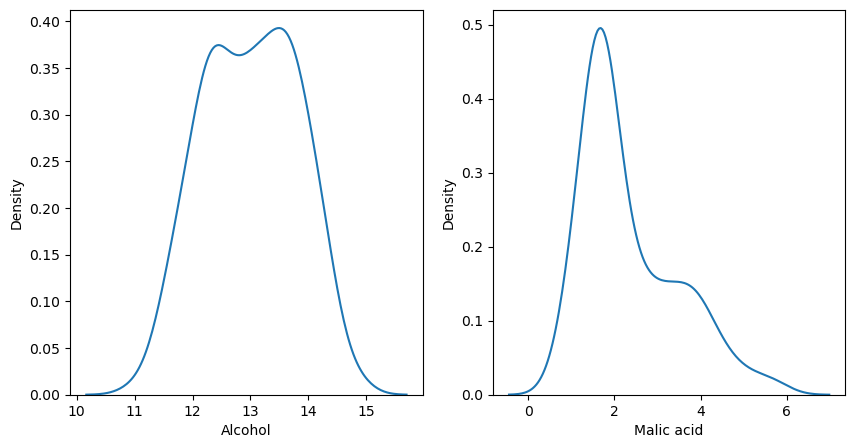

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Alcohol'])

plt.subplot(1,2,2)
sns.kdeplot(df['Malic acid'])

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

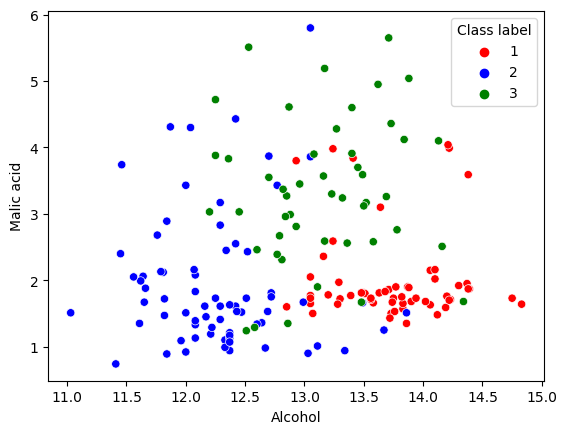

In [15]:
color_dict={1:'red', 2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue=df['Class label'], palette=color_dict)

### Train Test Split




In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X=df[['Alcohol','Malic acid']] ##or 
#df.drop('Class label', axis=1)

In [19]:
X

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [20]:
y=df['Class label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape

((119, 2), (59, 2))

### MinMaxScalar

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scalar=MinMaxScaler()

In [26]:
scalar.fit(X_train)

MinMaxScaler()

In [28]:
#Scaled the data
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [29]:
#Convert numpy arry data to Dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)


In [30]:
X_train_scaled

,Alcohol,Malic acid
0,0.489247,0.500000
1,0.755376,0.678571
2,0.610215,0.174370
3,0.543011,0.623950
4,0.397849,0.073529
...,...,...
114,0.212366,0.174370
115,0.360215,0.058824
116,0.373656,0.151261
117,0.771505,0.165966


In [31]:
X_test_scaled

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513
5,0.142473,0.243697
6,0.814516,0.264706
7,0.357527,0.617647
8,0.327957,0.176471
9,0.282258,0.197479


In [34]:
np.round(X_train.describe(),1) # Before scaling

,Alcohol,Malic acid
count,119.0,119.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [35]:
np.round(X_train_scaled.describe(),1) #After scaling train data

,Alcohol,Malic acid
count,119.0,119.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


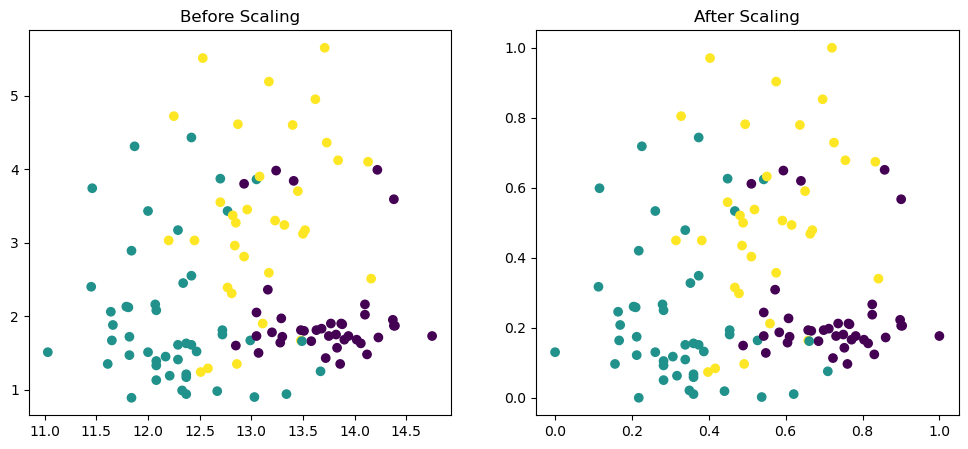

In [37]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()

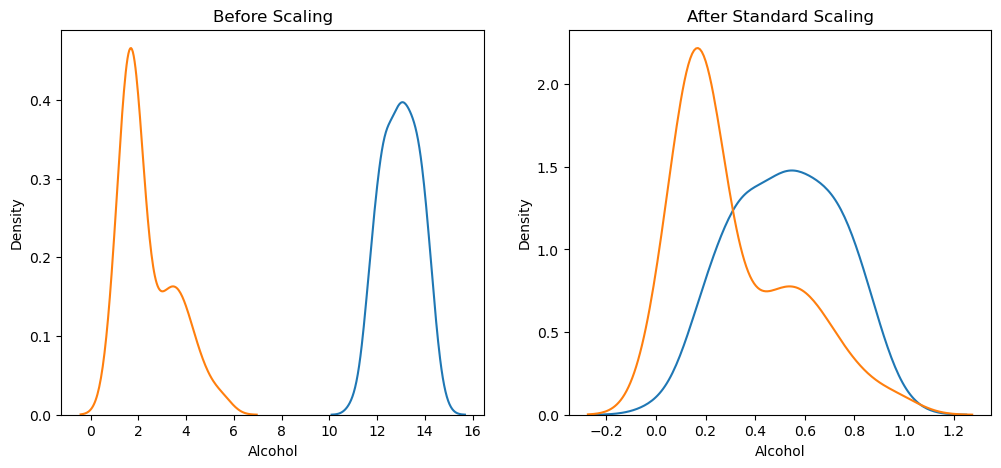

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

<AxesSubplot:title={'center':'After Standard Scaling'}, xlabel='Alcohol', ylabel='Density'>

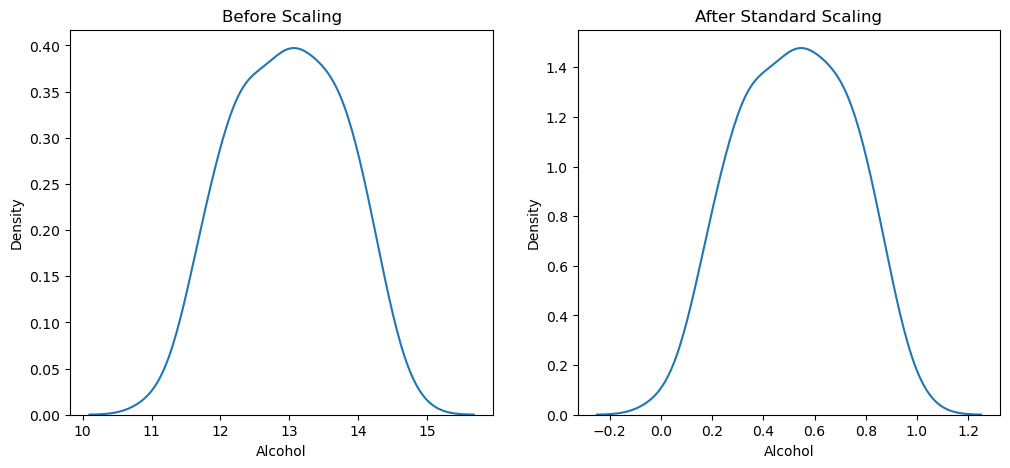

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

<AxesSubplot:title={'center':'After Standard Scaling'}, xlabel='Malic acid', ylabel='Density'>

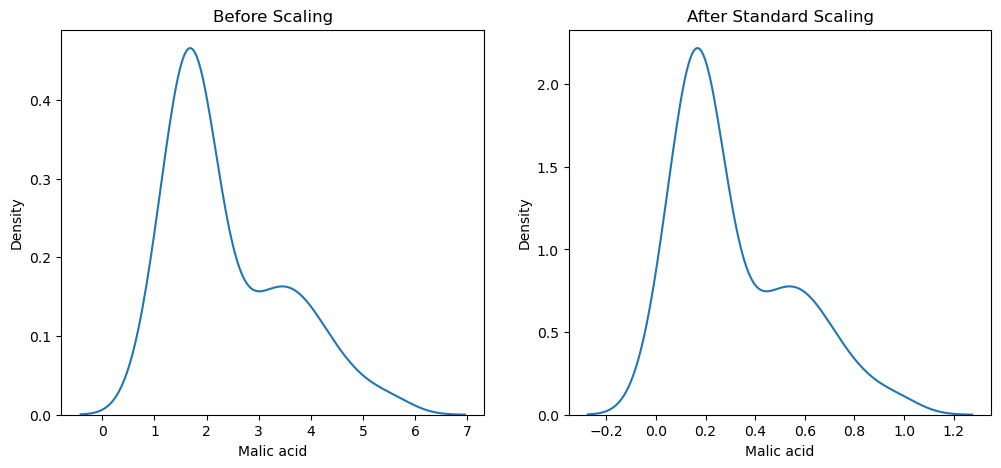

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)